In [1]:
import sys 
sys.path.append('..')


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from utils.functions import df_calculate_pvalues, dropna_spearmanr, df_calculate_bootstrap_corr

In [ ]:
a_classified = pd.read_excel('../input/quotient_deviation_df_A_CLASSIFIED.xlsx')

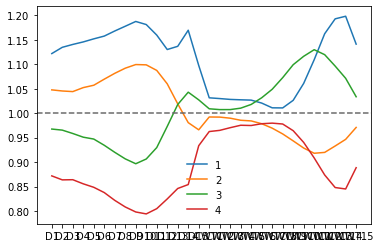

In [13]:
for i in range(4):
    plt.plot(a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31],label=str(i+1))
plt.axhline(y=1, color='dimgray', linestyle='--')
plt.legend(frameon=False)

In [4]:
from numpy import trapz

for i in range(4):
    selected = a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31]
    pos = trapz([el for el in selected[:15] if el >= 1])
    neg = trapz([el for el in selected[:15] if el < 1])
    print('Diam', i+1, ':', pos - neg)

for i in range(4):
    selected = a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31]
    pos = trapz([el for el in selected[15:] if el >= 1])
    neg = trapz([el for el in selected[15:] if el < 1])
    print('CWT', i+1, ':', pos - neg)

for i in range(4):
    selected = a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31]
    pos = trapz([el for el in selected if el >= 1])
    neg = trapz([el for el in selected if el < 1])
    print('Diam + CWT', i+1, ':', pos - neg)

Diam 1 : 16.147704995346956
Diam 2 : 11.846233096008525
Diam 3 : -8.220909367821411
Diam 4 : -11.72601158144886
CWT 1 : 14.988937491111374
CWT 2 : -13.427999589801171
CWT 3 : 14.848086172399565
CWT 4 : -13.127053279195788
Diam + CWT 1 : 32.20099378848954
Diam + CWT 2 : -2.560847024946554
Diam + CWT 3 : 7.64521568483503
Diam + CWT 4 : -25.801087389383383


In [4]:
crn = pd.read_excel('../input/BGD_chron.xlsx')
crn = crn[crn['Year']>1812]
areas_df = pd.read_csv('../output/Year_Areas_difference_fixed.csv')

In [7]:
diam_scale = {
    1:1,
    2:2,
    3:3,
    4:4
}

cwt_scale = {
    1:1,
    2:4,
    3:2,
    4:3
}

diam_cwt_scale = {
    1:1,
    2:3,
    3:2,
    4:4
}

In [8]:
y1 = [diam_scale[i+1] for i in a_classified['Class 4']]
y2 = [cwt_scale[i+1] for i in a_classified['Class 4']]
y3 = [diam_cwt_scale[i+1] for i in a_classified['Class 4']]

In [54]:
Min_PDSI = pd.read_excel('../input/Minusinsk-PDSI_SPEI-MJJAS.xlsx', sheet_name='Min_PDSI')
Min_SPEI = pd.read_excel('../input/Minusinsk-PDSI_SPEI-MJJAS.xlsx', sheet_name='Min_SPEI')

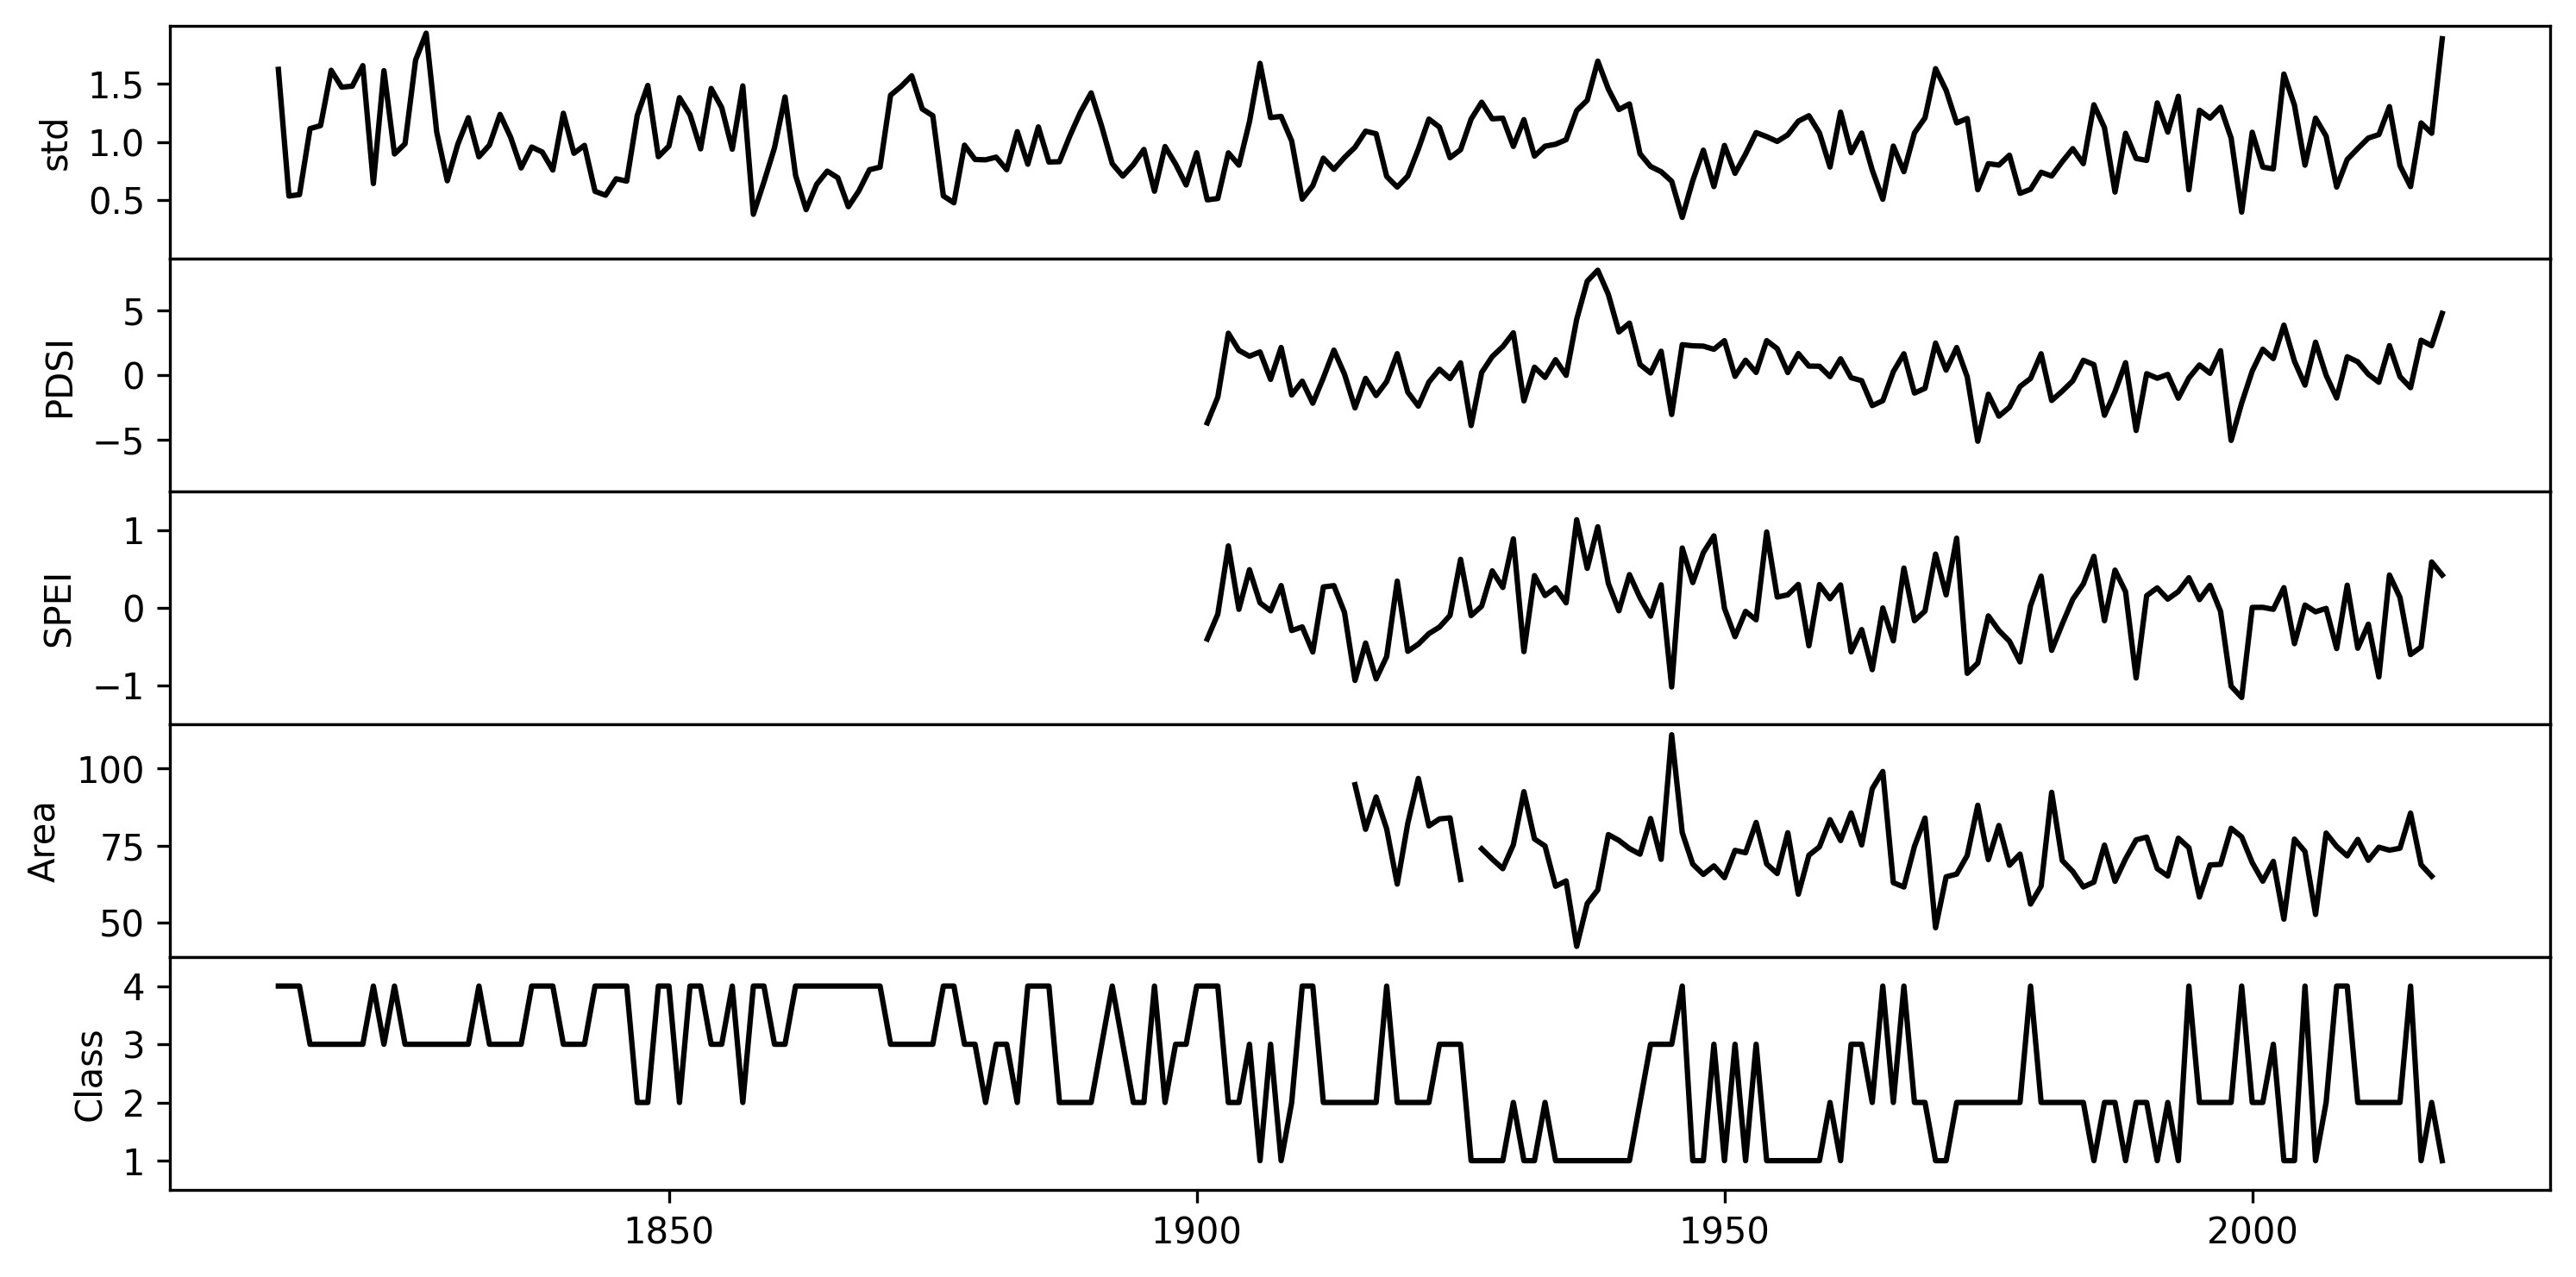

In [43]:
fig, axes = plt.subplots( nrows=5, ncols=1, dpi=300, figsize=(10,5), sharex=True)
plt.subplots_adjust(hspace=0, left=.06, right=.98, top=.99, bottom=.09)
#axes[0].plot(crn['Year'], crn['res'], c='black', label='res')
axes[0].plot(crn['Year'], crn['std'], c='black', label='std')
axes[1].plot(Min_PDSI['Year'], Min_PDSI['Mean'], c='black', label='PDSI')
axes[2].plot(Min_SPEI['Year'], Min_SPEI['Mean'], c='black', label='SPEI')
axes[3].plot(areas_df['Year'], areas_df['Area'], c='black', label='Area')
#axes[0].legend(frameon=False)

x = a_classified['Year']
axes[4].plot(x, y1, color='black')

axes[0].set_ylim([0, 2])
axes[1].set_ylim([-9, 9])
axes[2].set_ylim([-1.5, 1.5])
axes[4].set_ylim([0.5,4.5])

axes[0].set_ylabel('std')
axes[1].set_ylabel('PDSI')
axes[2].set_ylabel('SPEI')
axes[3].set_ylabel('Area')
axes[4].set_ylabel('Class')

axes[0].set_yticks(np.arange(0.5,2, 0.5))
axes[3].set_yticks([50, 75, 100])
axes[4].set_yticks(range(1,5))
plt.show()

In [97]:

fig.savefig(f'../output/Fig 00.png', dpi=300) 
plt.close(fig)

In [47]:
print('corrwith;r;p-value')

std = crn[crn['Year'].isin(areas_df['Year'])]['std']
r, p = dropna_spearmanr(std, areas_df['Area'])
print(f'std / AREA;{r};{p}')

std = crn[crn['Year'].isin(Min_PDSI['Year'])]['std']
r, p = dropna_spearmanr(std, Min_PDSI['Mean'])
print(f'std / PDSI;{r};{p}')

std = crn[crn['Year'].isin(Min_SPEI['Year'])]['std']
r, p = dropna_spearmanr(std, Min_SPEI['Mean'])
print(f'std / SPEI;{r};{p}')

std = crn[crn['Year'].isin(a_classified['Year'])]['std']
r, p = dropna_spearmanr(std, y1)
print(f'std / CLASS;{r};{p}')

std = Min_PDSI[Min_PDSI['Years'].isin(areas_df['Year'])]['Mean']
r, p = dropna_spearmanr(std, areas_df['Area'])
print(f'AREA / PDSI;{r};{p}')

std = Min_SPEI[Min_SPEI['Years'].isin(areas_df['Year'])]['Mean']
r, p = dropna_spearmanr(std, areas_df['Area'])
print(f'AREA / SPEI;{r};{p}')

std = a_classified[a_classified['Year'].isin(areas_df['Year'])]['Class 4']
r, p = dropna_spearmanr(std, areas_df['Area'])
print(f'AREA / CLASS;{r};{p}')

std = a_classified[a_classified['Year'].isin(Min_PDSI['Year'])]['Class 4']
r, p = dropna_spearmanr(std, Min_PDSI['Mean'])
print(f'CLASS / PDSI;{r};{p}')

std = a_classified[a_classified['Year'].isin(Min_SPEI['Year'])]['Class 4']
r, p = dropna_spearmanr(std, Min_SPEI['Mean'])
print(f'CLASS / SPEI;{r};{p}')

r, p = dropna_spearmanr(Min_PDSI['Mean'], Min_SPEI['Mean'])
print(f'PDSI / SPEI;{r};{p}')

corrwith;r;p-value
std / AREA;-0.2347046967365336;0.017574829907887467
std / PDSI;0.39677441169110816;8.659759821722497e-06
std / SPEI;0.239344364191942;0.009045661613218119
std / CLASS;-0.5129936567254323;5.917203112255471e-15
AREA / PDSI;-0.5870648172755597;8.876447355317764e-11
AREA / SPEI;-0.5788997517684379;1.850013615723077e-10
AREA / CLASS;0.32247367703925534;0.0009482256888732319
CLASS / PDSI;-0.4331675231538228;9.616399806961264e-07
CLASS / SPEI;-0.30213050777922573;0.0008838605843574165
PDSI / SPEI;0.7134676556411352;1.2382096733682272e-19


In [71]:
df = crn.merge(Min_PDSI[['Year', 'Mean']], on='Year', how='left', suffixes=('_crn', '_PDSI')
         ).merge(Min_SPEI[['Year', 'Mean']], on='Year', how='left', suffixes=('_PDSI', '_SPEI')
                ).merge(areas_df, on='Year', how='left'
                        ).merge(a_classified[['Year', 'Class 4']], on='Year', how='left')

In [78]:
df.to_excel('../output/scale_table.xlsx', index=False)

In [95]:
df_corr = df.drop(columns=['Year']).corr('spearman')
df_pval = df_calculate_pvalues(df.drop(columns=['Year']), 'spearman')

fine_corr_df = []
for r_row, p_row in zip(df_corr.iterrows(), df_pval.iterrows()):
    temp_l = []
    for r, p in zip(r_row[1], p_row[1]):
        temp_l += [ f'{r:.2f}\n(p={p:.3f})']
    fine_corr_df += [temp_l]

pd.DataFrame(fine_corr_df, columns=df_corr.columns, index=df_corr.index).to_excel('../output/scale_corr_table.xlsx')

In [3]:
scale_table = pd.read_excel('../output/to_send/005/scale_table.xlsx')

In [5]:
scale_table

,Year,std,res,Mean_PDSI,Mean_SPEI,AREA,CLASS
0,1813,1.625,1.312,NaN,NaN,NaN,4.0
1,1814,0.537,0.536,NaN,NaN,NaN,4.0
2,1815,0.549,0.624,NaN,NaN,NaN,4.0
3,1816,1.116,1.172,NaN,NaN,NaN,3.0
4,1817,1.142,1.194,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...
201,2014,0.798,0.705,-0.135421,0.132161,74.123124,2.0
202,2015,0.618,0.619,-0.986575,-0.602905,85.534619,4.0
203,2016,1.165,1.239,2.685409,-0.505205,68.752470,1.0
204,2017,1.076,0.941,2.259978,0.590161,65.020415,2.0


In [5]:
df_corr = scale_table.drop(columns=['Year']).corr('spearman')
df_pval = df_calculate_pvalues(scale_table.drop(columns=['Year']), 'spearman')

fine_corr_df = []
for r_row, p_row in zip(df_corr.iterrows(), df_pval.iterrows()):
    temp_l = []
    for r, p in zip(r_row[1], p_row[1]):
        temp_l += [ f'{r:.2f}\n(p={p:.3f})']
    fine_corr_df += [temp_l]

fine_corr_df = pd.DataFrame(fine_corr_df, columns=df_corr.columns, index=df_corr.index)

In [8]:
fine_corr_df.to_excel('../output/scale_corr_table.xlsx')

In [20]:
df_bootstrap = df_calculate_bootstrap_corr(scale_table.drop(columns=['Year']))


In [21]:
df_bootstrap

,std,res,Mean_PDSI,Mean_SPEI,AREA,CLASS
std,NaN,0.91,0.39,0.24,-0.22,-0.51
res,0.91,NaN,0.37,0.22,-0.27,-0.53
Mean_PDSI,0.39,0.37,NaN,0.69,-0.57,-0.41
Mean_SPEI,0.24,0.22,0.69,NaN,-0.56,-0.29
AREA,-0.22,-0.27,-0.57,-0.56,NaN,0.30
CLASS,-0.51,-0.53,-0.41,-0.29,0.30,NaN


In [67]:
df_bootstrap.to_excel('../output/to_send/005/df_bootstrap.xlsx')

In [4]:
from utils.functions import dropna

In [23]:
def df_calculate_len(df,):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = len(dropna(df[r], df[c])[0])
            #print(r, c, len(dropna(df[r], df[c])[0]))
    return pvalues

In [24]:
df_calculate_len(scale_table.drop(columns=['Year']))

,std,res,Mean_PDSI,Mean_SPEI,AREA,CLASS
std,206,206,118,118,102,202
res,206,206,118,118,102,202
Mean_PDSI,118,118,118,118,102,118
Mean_SPEI,118,118,118,118,102,118
AREA,102,102,102,102,102,102
CLASS,202,202,118,118,102,202


In [16]:
len(dropna(scale_table['std'], scale_table['CLASS'])[0])

202